In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# read dataset into a dataframe
df = pd.read_csv('Resources/clean_realestate_data.csv')
df.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,for_sale,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0
1,for_sale,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0
2,for_sale,384900.0,3.0,2.0,0.46,Agawam,Massachusetts,1001.0,1476.0
3,for_sale,199999.0,3.0,2.0,1.76,Agawam,Massachusetts,1001.0,1968.0
4,for_sale,419000.0,4.0,2.0,2.00,Pelham,Massachusetts,1002.0,1607.0


In [3]:
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
df = pd.DataFrame(x)

In [4]:
df.rename(columns={0:'Price',1:'bed',2:'bath',3:'acre_lot',4:'zip_code',5:'house_size',6:'status',7:'city',8:'state'},inplace=True)
#df.drop(columns=[7,8,9,10],inplace=True)
df

,Price,bed,bath,acre_lot,zip_code,house_size,status,city,state
0,525000.0,3.0,3.0,0.45,1001.0,2314.0,0.0,65.0,19.0
1,289900.0,3.0,2.0,0.36,1001.0,1276.0,0.0,65.0,19.0
2,384900.0,3.0,2.0,0.46,1001.0,1476.0,0.0,65.0,19.0
3,199999.0,3.0,2.0,1.76,1001.0,1968.0,0.0,65.0,19.0
4,419000.0,4.0,2.0,2.00,1002.0,1607.0,0.0,10327.0,19.0
...,...,...,...,...,...,...,...,...,...
1086258,359900.0,4.0,2.0,0.33,99354.0,3600.0,1.0,11255.0,45.0
1086259,350000.0,3.0,2.0,0.10,99354.0,1616.0,1.0,11255.0,45.0
1086260,440000.0,6.0,3.0,0.50,99354.0,3200.0,1.0,11255.0,45.0
1086261,179900.0,2.0,1.0,0.09,99354.0,933.0,1.0,11255.0,45.0


<Axes: >

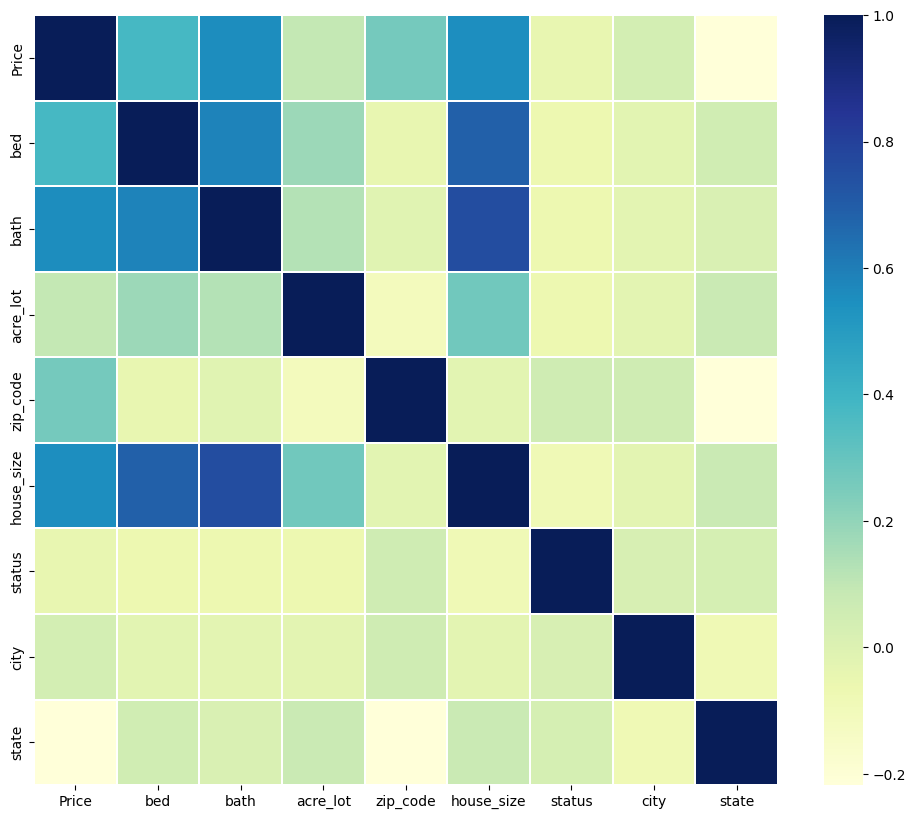

In [5]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [6]:
corrmat

,Price,bed,bath,acre_lot,zip_code,house_size,status,city,state
Price,1.000000,0.381352,0.554097,0.093121,0.263430,0.549949,-0.045338,0.042514,-0.214208
bed,0.381352,1.000000,0.584764,0.181278,-0.044205,0.689006,-0.063486,-0.021610,0.049268
bath,0.554097,0.584764,1.000000,0.126570,-0.012888,0.753534,-0.062221,-0.024288,0.015535
acre_lot,0.093121,0.181278,0.126570,1.000000,-0.113269,0.272675,-0.064043,-0.027036,0.072345
zip_code,0.263430,-0.044205,-0.012888,-0.113269,1.000000,-0.018777,0.056943,0.055800,-0.218151
house_size,0.549949,0.689006,0.753534,0.272675,-0.018777,1.000000,-0.081583,-0.027085,0.074308
status,-0.045338,-0.063486,-0.062221,-0.064043,0.056943,-0.081583,1.000000,0.020351,0.029588
city,0.042514,-0.021610,-0.024288,-0.027036,0.055800,-0.027085,0.020351,1.000000,-0.076790
state,-0.214208,0.049268,0.015535,0.072345,-0.218151,0.074308,0.029588,-0.076790,1.000000
